In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\01\Desktop\diabetes_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [6]:
gender=pd.get_dummies(df["gender"],dtype=int)

In [7]:
df=pd.concat([df,gender],axis=1)

In [8]:
df.drop(['gender'],axis=1,inplace=True)

In [9]:
smok=pd.get_dummies(df['smoking_history'],dtype=int)

In [10]:
df=pd.concat([df,smok],axis=1)

In [11]:
df.drop(['smoking_history'],axis=1,inplace=True)

In [12]:
df.drop(['No Info'],axis=1,inplace=True)

In [13]:
x=df.drop(['diabetes'],axis=1)

In [14]:
y=df['diabetes']

In [15]:
x=StandardScaler().fit_transform(x)


In [16]:
def matrix(ytrue,ypred):
    xx=confusion_matrix(ytrue,ypred)
    ax=sns.heatmap(xx,annot=True)
    ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=63)

In [18]:
Logistic=LogisticRegression()

In [19]:
Logistic.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
Logistic_pred=Logistic.predict(xtest)

In [21]:
Logistic_score=accuracy_score(ytest,Logistic_pred)
Logistic_score

0.9607

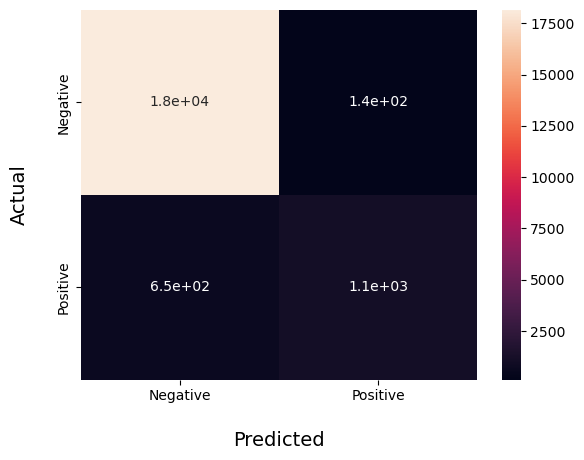

In [22]:
matrix(ytest,Logistic_pred)

In [23]:
forest=RandomForestClassifier().fit(xtrain,ytrain)

In [24]:
forest_pred=forest.predict(xtest)

In [25]:
forest_score=accuracy_score(ytest,forest_pred)
forest_score

0.9692

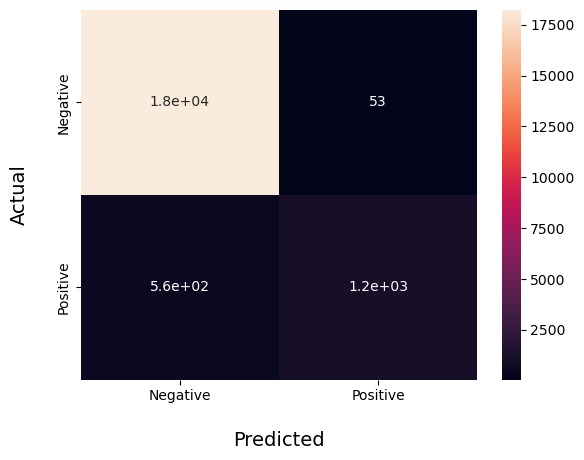

In [26]:
matrix(ytest,forest_pred)

In [27]:
svc=SVC().fit(xtrain,ytrain)

In [28]:
svc_pred=svc.predict(xtest)

In [29]:
svc_score=accuracy_score(ytest,svc_pred)
svc_score

0.962

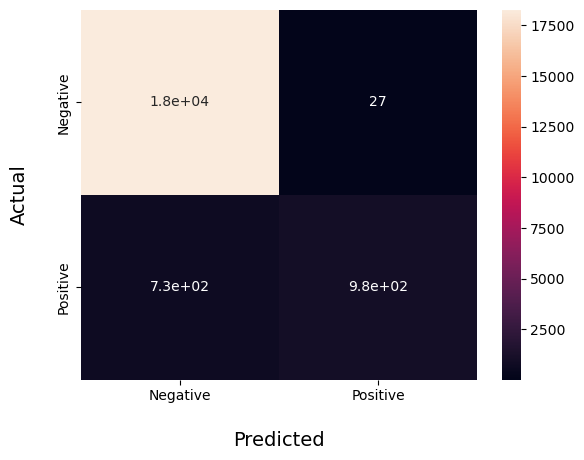

In [30]:
matrix(ytest,svc_pred)

In [31]:
xg=XGBClassifier().fit(xtrain,ytrain)

In [32]:
xg_pred=xg.predict(xtest)

In [33]:
xg_score=accuracy_score(ytest,xg_pred)
xg_score

0.96985

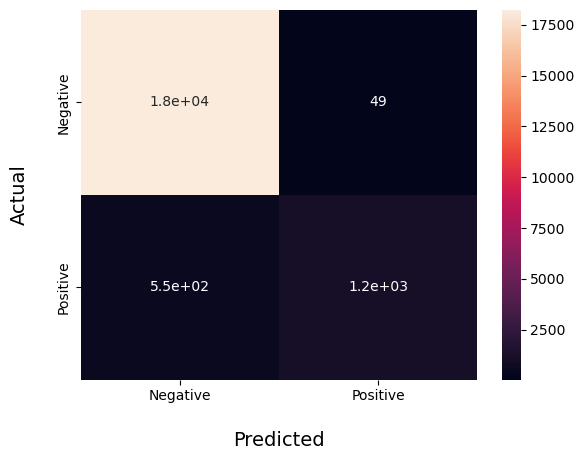

In [34]:
matrix(ytest,xg_pred)

In [35]:
knn=KNeighborsClassifier()

In [36]:
param_grid={'n_neighbors':[3,4,5,6]}

In [37]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

C:\Users\01\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\01\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6]})

In [38]:
best_params = grid_search.best_params_
best_params

{'n_neighbors': 6}

In [39]:
kn=KNeighborsClassifier(6).fit(xtrain,ytrain)

In [40]:
knn_pred=kn.predict(xtest)

C:\Users\01\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
knn_score=accuracy_score(ytest,knn_pred)
knn_score

0.96035

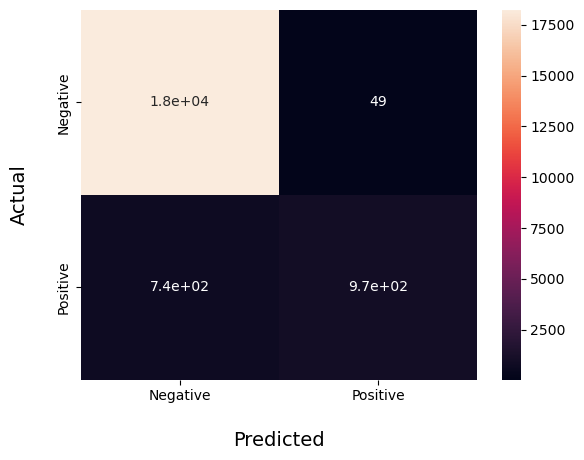

In [42]:
matrix(ytest,knn_pred)

In [43]:
data={"algorithm":["rendomforest","knn","xgb","logestic","svc"],"accuracy":[forest_score,knn_score,xg_score,Logistic_score,svc_score]}

In [44]:
score=pd.DataFrame(data)

In [45]:
score

,algorithm,accuracy
0,rendomforest,0.96920
1,knn,0.96035
2,xgb,0.96985
3,logestic,0.96070
4,svc,0.96200
